# __Classify Clothes Using Python and Artificial Neural Networks__

Fashion-MNIST is a dataset of Zalando's fashion article images —consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label.

“Fashion MNIST” dataset here is used for experimenting and practicing machine learning. Fashion-MNIST dataset is a collection of articles images provided by Zalando(https://zalando.com/) . Thanks to Zalando Research(https://github.com/zalandoresearch/fashion-mnist) for hosting the dataset. 

## Description: This program classifies clothes from the Fashion MNIST data set
In this notebook I have used fashion_mnist dataset availavle on keras.datasets

In [1]:
#Import the libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Next, load the data set into the variables train_images (the variable that contains the images to train on) , train_labels (the variable that contains the labels of the images in the training set), test_images (the variable that contains the images to test on), and the test_labels (the variable that contains the labels of the images in the test set).

In [2]:
# load the data set
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
#Print the shape 
print(train_images.shape)# 60,000 rows of 28 x 28 pixel images
print(test_images.shape) # 10,000 rows of 28 x 28 pixel images

(60000, 28, 28)
(10000, 28, 28)



The class labels for Fashion MNIST are:
<br>
<br>
<b>Label</b> &nbsp;  <b>Description</b>
<br>
0   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   T-shirt/top
<br>
1   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Trouser
<br>
2   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Pullover
<br>
3   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Dress
<br>
4   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Coat
<br>
5   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Sandal
<br>
6   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Shirt
<br>
7   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Sneaker
<br>
8   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Bag
<br>
9   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Ankle boot
<br>

Our dataset consists of 60,000 images and each image has 784 features. An image consists of 28x28 pixels, and each pixel is a value from 0 to 255 describing the pixel intensity. 0 for white and 255 for black.

Let us have a look at one instance (an article image) of this training dataset train_images.

To view a single instance(an article image),all we need to do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s imshow() function.

In [20]:
# create a label dictionary
label_dict = {'0': 'T-shirt/top',
              '1': 'Trouser',
              '2': 'Pullover',
              '3': 'Dress',
              '4': 'Coat',
              '5': 'Sandal',
              '6': 'Shirt',
              '7': 'Sneaker',
              '8': 'Bag',
              '9': 'Ankle boot'}

Image Label: 9(T-shirt/top)


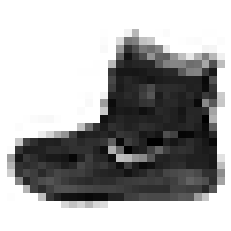

In [22]:
# view a training image
def showImage(data):
    some_article = data
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    print("Image Label: " + str(train_labels[img_index]) + "(" + label_dict[str(img_index)] + ")")
    plt.imshow(some_article_image, cmap = plt.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

img_index = 0  
showImage(train_images[img_index])

Image Label: 3(Dress)


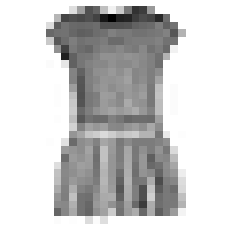

In [23]:
img_index = 3 
showImage(train_images[img_index])

## __Build the model__ 

Build the model with 3 layers (1 layer to flatten the image to a 28 x 28 = 784 vector, 1 layer with 128 neurons and relu activation function & 1 layer with 10 neurons and the Softmax function). We have 10 neurons because we have 10 labels for the image data set.

In [6]:
# Build the model
# 3 layers, 1 layer to flatten the image to a 28 x 28 = 784 vector
#           1 layer with 128 neurons and relu function
#           1 layer with 10 neurons and softmax function#Create the neural network model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

### __Compile the model__ 

Compile the model using the loss function sparse_categorical_crossentropywhich is used for classes that are greater than 2, since we will have 9 classes we will use this function. Those classes being the numbers from 0 to 9 for example: 0,1,2,3,…9. I will also add in a metric to show the accuracy of the model. Adam is an optimization algorithm that can used instead of the classical stochastic gradient descent procedure to update network weights on training data.

__Optimization Function:__ A function that seeks to minimize a loss function.

__Loss Function:__ In mathematical optimization and decision theory, a loss function or cost function is a function that maps an event or values of one or more variables onto a real number intuitively representing some “cost” associated with the event. Essentially it is a method of evaluating how well your algorithm models your data set.

In [9]:
# Compile the model
# The loss function measures how well the model did on training , and then tries to improve on it using the optimizer

model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

### __Train the model__ 

Train the model using the train_images, and train_labels variables (the variables / data set that contains the training data). I will iterate 30 times over the entire data set to train on, with a number of 32 samples per gradient update for training.

In [11]:
#Train the model
model.fit(train_images, 
          train_labels,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=30, #number of iterations over the entire dataset to train on
          batch_size=32)#number of samples per gradient update for training

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 80us/sample - loss: 0.4880 - accuracy: 0.8319
Epoch 2/30
60000/60000 [==============================] - 5s 80us/sample - loss: 0.4827 - accuracy: 0.8355
Epoch 3/30
60000/60000 [==============================] - 5s 81us/sample - loss: 0.4762 - accuracy: 0.8365
Epoch 4/30
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4651 - accuracy: 0.8393
Epoch 5/30
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4621 - accuracy: 0.8406
Epoch 6/30
60000/60000 [==============================] - 5s 81us/sample - loss: 0.4589 - accuracy: 0.8424
Epoch 7/30
60000/60000 [==============================] - 5s 82us/sample - loss: 0.4632 - accuracy: 0.8406
Epoch 8/30
60000/60000 [==============================] - 5s 86us/sample - loss: 0.4456 - accuracy: 0.8470
Epoch 9/30
60000/60000 [==============================] - 5s 82us/sample - loss: 0.4413 - accuracy: 0.8479
Epoch 10/30
60

Now it’s time to __evaluate the model__ to see how well it performs on the testing data set. The model performed well, it is about 85.64% accurate

In [12]:
#Evaluate the model
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 62us/sample - loss: 0.5940 - accuracy: 0.8152


[0.5940272416353226, 0.8152]

__Make predictions__ using the model. I will predict the class of the first 5 test images using this model, as well as the actual labels

In [13]:
#Make a prediction
predictions = model.predict(test_images[:5])
print(np.argmax(predictions, axis=1)) #Print the predicted labels
print(test_labels[:5]) #Print the actual labels

[9 2 1 1 6]
[9 2 1 1 6]


Finally I will print the clothes fashion images to the screen. More specifically I will print the first 5 images of the testing data to the screen as a 28 x 28 pixel that is gray.

Image Label: 9(T-shirt/top)


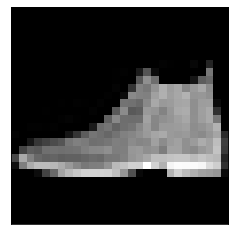

Image Label: 0(Trouser)


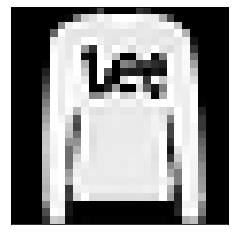

Image Label: 0(Pullover)


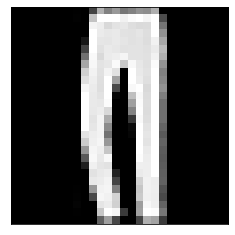

Image Label: 3(Dress)


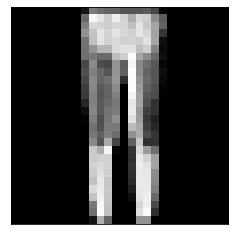

Image Label: 0(Coat)


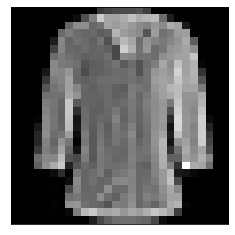

In [26]:
for i in range(0,5):
    first_image = test_images[i]
    first_image = np.array(first_image, dtype='float')
    pixels = first_image.reshape((28, 28))
    print("Image Label: " + str(train_labels[i]) + "(" + label_dict[str(i)] + ")")
    plt.imshow(pixels, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

## I will improve this model by using data agumentation